In [84]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

# Any results you write to the current directory are saved as output.

['test', 'train', 'sample_submission.csv']


In [85]:
TRAIN_DIR = '../input/train/'
TEST_DIR = '../input/test/'

ROWS = 64
COLS = 64
CHANNELS = 3

train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] # use this for full dataset
train_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]

test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [86]:
import random
cats=train_cats[:1000]
dogs=train_dogs[:1000]
train=cats+dogs
random.shuffle(train)
test =  test_images[:25]

In [87]:
a=cv2.imread(train[0])
rows = 64
col = 64
cha= 3

In [88]:
len(test)

25

In [89]:
def process(passs):
    count=len(passs)
    data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)
    for i in range(len(passs)):
        a=cv2.imread(passs[i])
        a=cv2.resize(a,(rows,col))
        data[i]=a.T
    return data

In [90]:
data=process(train)
datat=process(test)
b=data[0][0]
b.shape

(64, 64)

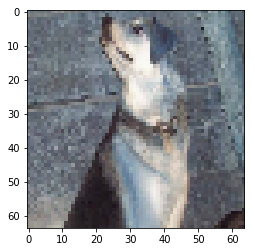

In [91]:
plt.imshow(data[0].T)

In [92]:
#by tensowflow
import tensorflow as tf

def process(image):
    images=[]
    a=tf.placeholder(dtype=tf.string)
    b=tf.read_file(a)
    c=tf.image.decode_jpeg(b)
    
    
    with tf.Session() as sess:
        for i in range(len(image)):
            images.append(sess.run(c,feed_dict={a:image[i]}))
    sess.close()
    return(images)

In [93]:
datat=process(test)

In [94]:
#neural network using tensorflow

In [95]:
data.shape

(2000, 3, 64, 64)

In [96]:
a=data[0]

In [97]:
b=a.T
b.shape

(64, 64, 3)

In [98]:
x=np.ndarray((2000,64,64,3),dtype=np.uint8)
x1=np.ndarray((25,64,64,3),dtype=np.uint8)
for i in range(len(train)):
    a=data[i]
    a=a.T
    x[i]=a
for i in range(len(test)):
    a=datat[i]
    a=a.T
    x1[i]=a
    

ValueError: could not broadcast input array from shape (3,500,430) into shape (64,64,3)

In [99]:
print(x.shape)
print(x1.shape)

(2000, 64, 64, 3)
(25, 64, 64, 3)


In [100]:
labels = []
for i in train:
    if 'dog' in i:
        labels.append(1)
    else:
        labels.append(0)

In [101]:

tf.reset_default_graph()

In [102]:
Xf = x.reshape(x.shape[0],-1).T
X1f = x1.reshape(x1.shape[0],-1).T

In [103]:
X1f.shape

(12288, 25)

In [104]:
X = tf.placeholder(tf.float32, [12288, None], name="X")
Y=  tf.placeholder(tf.float32,[1,None],name="Y")

In [105]:

tf.set_random_seed(1)
w1 = tf.get_variable("w1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
w2 = tf.get_variable("w2", [12,25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
w3 = tf.get_variable("w3", [6,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b3 = tf.get_variable("b3", [6,1], initializer = tf.zeros_initializer())
w4 = tf.get_variable("w4", [1,6], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b4 = tf.get_variable("b4", [1,1], initializer = tf.zeros_initializer())

In [106]:
Z1 = tf.matmul(w1, X) + b1                                               # Z1 = np.dot(W1, X) + b1
A1 = tf.nn.relu(Z1)                                             # A1 = relu(Z1)
Z2 = tf.matmul(w2, A1) + b2                                              # Z2 = np.dot(W2, a1) + b2
A2 = tf.nn.relu(Z2)                                              # A2 = relu(Z2)
Z3 = tf.matmul(w3, A2) + b3
A3=tf.nn.relu(Z3)
Z4=tf.matmul(w4,A3) + b4
A4=tf.sigmoid(Z4)

In [107]:
logits = tf.transpose(A4)

    
    ### START CODE HERE ### (1 line of code)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))

In [108]:
 optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

In [109]:
init = tf.global_variables_initializer()

In [ ]:
labels=np.array(labels)
labels=labels.reshape(2000,1)
labels=labels.T
with tf.Session() as sess:
        sess.run(init)
        for j in range(10):
            sess.run([cost,optimizer],feed_dict={X:Xf, Y:labels})
            if (i==20):
                print('20 done')    

In [ ]:
print(labels.shape)
print(Y)
print(Xf.shape)
print(X)

In [ ]:
q=Xf.T[0].reshape(12288,1)

In [ ]:
type(Xf)

In [ ]:
w=np.array(labels[4])

In [ ]:
q=w.reshape(1,1)

In [ ]:
q.shape